In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop("User ID",axis=1,inplace=True)

In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.describe(include=["object"])

,Gender
count,400
unique,2
top,Female
freq,204


In [8]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df["Gender"]=oe.fit_transform(df[["Gender"]])

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.0,19,19000,0
1,1.0,35,20000,0
2,0.0,26,43000,0
3,0.0,27,57000,0
4,1.0,19,76000,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    float64
 1   Age              400 non-null    int64  
 2   EstimatedSalary  400 non-null    int64  
 3   Purchased        400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


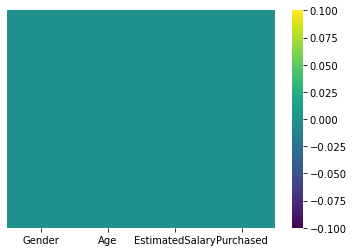

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
plt.show()

In [12]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [13]:
from scipy.stats import skew

Gender
Skewness: 0.04000800240080024


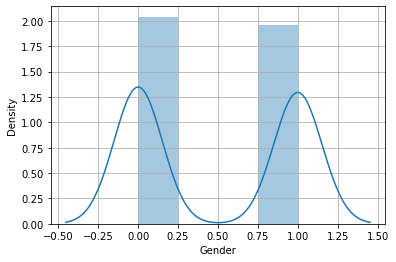

Age
Skewness: 0.23046904236325927


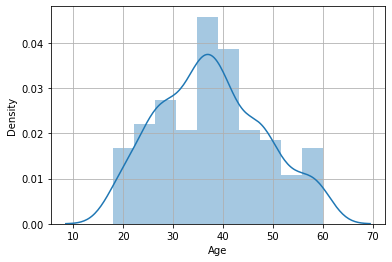

EstimatedSalary
Skewness: 0.49316535320478544


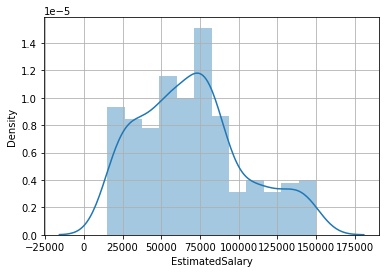

Purchased
Skewness: 0.5946621147053448


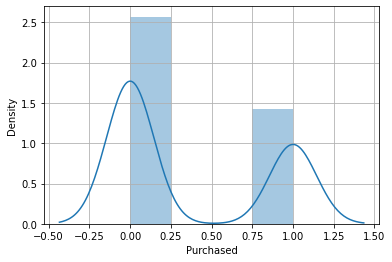

In [14]:
for col in df:
    print(col)
    print(f"Skewness: {skew(df[col])}")
    
    plt.figure()
    sns.distplot(df[col])
    plt.grid(True)
    plt.show()

In [15]:
df.corr()["Purchased"].sort_values()

Gender            -0.042469
EstimatedSalary    0.362083
Age                0.622454
Purchased          1.000000
Name: Purchased, dtype: float64

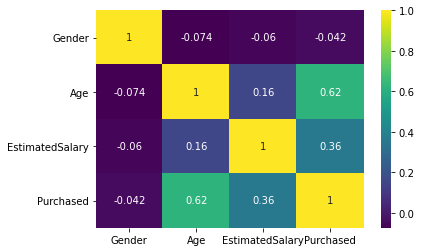

In [16]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

In [17]:
df["Gender"].value_counts()

0.0    204
1.0    196
Name: Gender, dtype: int64

In [18]:
oe.categories_

[array(['Female', 'Male'], dtype=object)]

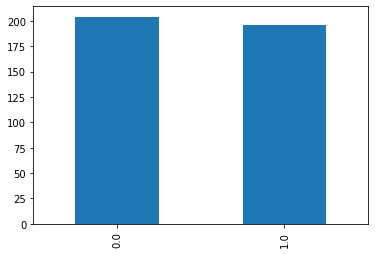

In [19]:
df["Gender"].value_counts().plot(kind="bar")
plt.show()

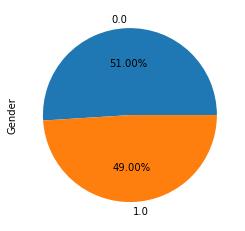

In [20]:
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [21]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

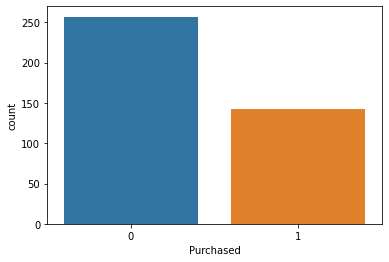

In [22]:
sns.countplot(df["Purchased"])
plt.show()

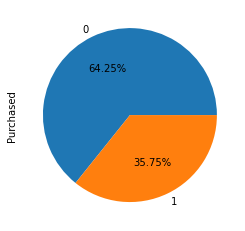

In [23]:
df["Purchased"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [24]:
df["Age"].max()

60

In [25]:
df["Age"].min()

18

In [26]:
df["Age"].mean()

37.655

In [27]:
df["EstimatedSalary"].max()

150000

In [28]:
df["EstimatedSalary"].min()

15000

In [29]:
df["EstimatedSalary"].mean()

69742.5

In [30]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [31]:
x=df.iloc[ : , :-1]
x.head()

,Gender,Age,EstimatedSalary
0,1.0,19,19000
1,1.0,35,20000
2,0.0,26,43000
3,0.0,27,57000
4,1.0,19,76000


In [32]:
y=df.iloc[ : ,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
accuracy_score(ytest,ypred)

0.75

In [37]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        48
           1       0.70      0.66      0.68        32

    accuracy                           0.75        80
   macro avg       0.74      0.73      0.74        80
weighted avg       0.75      0.75      0.75        80



In [38]:
confusion_matrix(ytest,ypred)

array([[39,  9],
       [11, 21]], dtype=int64)

#### Hyper-Parameter Tuning

In [39]:
accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

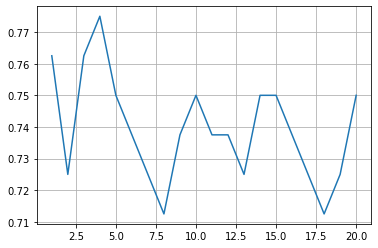

In [40]:
plt.plot(range(1,21),accuracy)
plt.grid(True)
plt.show()

In [41]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [42]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        48
           1       0.79      0.59      0.68        32

    accuracy                           0.78        80
   macro avg       0.78      0.74      0.75        80
weighted avg       0.78      0.78      0.77        80



In [43]:
accuracy_score(ytest,ypred)

0.775

In [44]:
confusion_matrix(ytest,ypred)

array([[43,  5],
       [13, 19]], dtype=int64)

#### Cross Validation Score

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cvs=cross_val_score(knn,x,y,cv=5,scoring="accuracy")
cvs

array([0.8125, 0.875 , 0.7375, 0.75  , 0.675 ])

In [47]:
cvs.mean()

0.7699999999999999

#### Bagging

In [48]:
from sklearn.ensemble import BaggingClassifier

In [49]:
bg=BaggingClassifier(knn)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [50]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        48
           1       0.68      0.66      0.67        32

    accuracy                           0.74        80
   macro avg       0.73      0.72      0.73        80
weighted avg       0.74      0.74      0.74        80



In [51]:
accuracy_score(ytest,ypred)

0.7375

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [53]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        48
           1       0.00      0.00      0.00        32

    accuracy                           0.60        80
   macro avg       0.30      0.50      0.37        80
weighted avg       0.36      0.60      0.45        80



In [54]:
print(accuracy_score(ytest,ypred))

0.6


In [55]:
confusion_matrix(ytest,ypred)

array([[48,  0],
       [32,  0]], dtype=int64)

#### Hyper-Parameter Tuning

In [56]:
params={
    "C":np.logspace(-3,3,7),
    "solver":["liblinear","lbfgs","sag","saga","newton-cg"],
    "penalty":["l1","l2","elasticnet"]
}

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid=GridSearchCV(logreg,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END ................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ................C=0.001, penalty=

[CV 3/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END ...............

[CV 2/5] END .................C=1.0, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END .................C=1.0, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END .................C=1.0, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END .................C=1.0, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END ............C=1.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END ............C=1.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END ............C=1.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END ............C=1.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END ............C=1.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ............C=1.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=1.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=1.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=1

[CV 1/5] END ...........C=10.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END ...........C=10.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END ...........C=10.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END ...........C=10.0, penalty=l2, solver=newton-cg; total time=   0.1s
[CV 5/5] END ...........C=10.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=10.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 2/5] END ...C=10.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 3/5] END ...C=10.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 4/5] END ...C=10.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 5/5] END ...C=10.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 1/5] END .......C=10.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END .......C=10.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END .......C=10.0, 

[CV 1/5] END ..............C=1000.0, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ..............C=1000.0, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ..............C=1000.0, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ..............C=1000.0, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ..............C=1000.0, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END .........C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END .........C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END .........C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END .........C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END .........C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END .........C=1000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END .........C=1000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END .........C=1000

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             verbose=3)

In [59]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [60]:
grid.best_score_

0.84375

In [61]:
grid.best_estimator_

LogisticRegression(C=0.1, solver='newton-cg')

In [62]:
logreg=grid.best_estimator_
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [63]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.76      0.81      0.79        32

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.83      0.82      0.83        80



In [64]:
accuracy_score(ytest,ypred)

0.825

In [65]:
confusion_matrix(ytest,ypred)

array([[40,  8],
       [ 6, 26]], dtype=int64)

#### Cross Validation Score

In [66]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(logreg,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.7    0.9625 0.925  0.8125 0.75  ]
CVS Mean: 0.8300000000000001
CVS Standard Deviation: 0.10018732454756941


#### Bagging

In [67]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(logreg)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.76      0.81      0.79        32

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.83      0.82      0.83        80



# Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)

In [69]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        48
           1       0.80      0.88      0.84        32

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80



In [70]:
accuracy_score(ytest,ypred)

0.8625

In [71]:
confusion_matrix(ytest,ypred)

array([[41,  7],
       [ 4, 28]], dtype=int64)

#### Cross Validation Score

In [72]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(nb,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.8125 0.9625 0.925  0.8125 0.9   ]
CVS Mean: 0.8825000000000001
CVS Standard Deviation: 0.06051859218455103


#### Bagging

In [73]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(nb)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [74]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        48
           1       0.80      0.88      0.84        32

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80



In [75]:
accuracy_score(ytest,ypred)

0.8625

## Decision Tree

In [ ]:
C